# Text mining - Projekt 2

Informatyka
<br>
Stacjonarnie
<br>
Specjalność: Analiza dużych zbiorów danych
<br>
Grupa 1
<br>
Karolina Tatarczyk, Antoni Perużyński

In [1]:
#!pip install -U nltk
#nltk.download('stopwords')
#nltk.download('punkt')

#pip install jaro-winkler
#pip install cdifflib
#pip install python-Levenshtein

### Imports

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

from sklearn.feature_extraction.text import CountVectorizer


import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances, cosine_distances,\
    cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import Levenshtein
from cdifflib import CSequenceMatcher
from jaro import jaro_winkler_metric

## Text cleaning

In [3]:
def stopwords_function(text: str) -> str:

    stop_words = stopwords.words('english')
    #word_token = word_tokenize(text)
    cleaned = [w for w in text if w not in stop_words]
    return " ".join(cleaned)

def stemming_function(text: str) -> list:
    stemming = PorterStemmer()
    txt_list = list(text.split(" "))
    stemmed_txt = []
    for w in txt_list:
        stemmed_txt.append(stemming.stem(w))
    return stemmed_txt

def clean_text(txt: str) -> str:
    find_emoticons = re.findall(r"[:;][-]?[/\|\)\(><D]", txt)
    txt_low = txt.lower()
    delete_numbers = re.sub("[0-9]+", "", txt_low)
    delete_html = re.sub(r'<.*?>', '', delete_numbers)
    delete_punctuation = re.sub(r"[^\w\s]", " ", delete_html)
    delete_whitespace = delete_punctuation.strip()
    clean_txt = delete_whitespace + ' '.join(find_emoticons)
    return clean_txt

def text_tokenizer(text: str):

    cleaned_text = clean_text(text)
    tokens = word_tokenize(cleaned_text)
    without_stopwords =stopwords_function(tokens)
    stemmed_text = stemming_function(without_stopwords)

    return [w for w in stemmed_text if len(w) > 3]

def vectorizing(sample):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names())
    array = X_transform_sample.toarray()
    return array, titles_sample

def vectorizing_voc(sample, vocabulary):
    vectorizer1 = CountVectorizer(tokenizer=text_tokenizer, vocabulary=vocabulary)
    X_transform_sample = vectorizer1.fit_transform(sample)
    titles_sample = (vectorizer1.get_feature_names())
    array = X_transform_sample.toarray()
    return array, titles_sample

## Entity mathcing in team names

In [4]:
data = pd.read_csv('compare_matches.csv',usecols=[0,1], names=['colA', 'colB'], header=1)
data.dropna()
#rows=data.index[[513,1456]]
#data.drop(rows, inplace=True)
#data.dropna()
#print(len(data))
data['Euclidean_distance'] = -1.0
data['Cosine_distance'] = -1.0
data['Cosine_similarity'] = -1.0
data['Levenshtein_distance'] = -1.0
data['SequenceMatcher'] = -1.0
data['JaroWinkler_similarity'] = -1.0

#dataset_col1=data.colA
#print(data.colA.iloc[[0]])
#dataset_col2=data.colB

#df10 = pd.DataFrame(data.colA.iloc[0], 'nazwa')
#print(len(data))
for i in range(0,len(data)):
    #print(i)
    if i in [513,1456]:
        i+=1
    #print(i)
    dataset_col1=data.colA.iloc[[i]]
    #print(dataset_col1.iloc[0])
    dataset_col2=data.colB.iloc[[i]]
    #print(dataset_col2.iloc[0])
    together_dataset = pd.concat([dataset_col1, dataset_col2])

    dataset_vector_voc, dataset_titles_voc = vectorizing(together_dataset)
    #if dataset_titles_voc == []:
        #dataset_vector_col1, dataset_titles_col1 = vectorizing(dataset_col1)
    #else:
    dataset_vector_col1, dataset_titles_col1 = vectorizing_voc(dataset_col1, dataset_titles_voc)
    #print(dataset_vector_col1)
    #print(dataset_titles_col1)
    df1 = pd.DataFrame(dataset_vector_col1, columns=dataset_titles_col1)
    
    
    dataset_vector_col2, dataset_titles_col2 = vectorizing_voc(dataset_col2, dataset_titles_voc)
    df2 = pd.DataFrame(dataset_vector_col2, columns=dataset_titles_col2)
    #print(dataset_vector_col2)
    #print(dataset_titles_col2)
    
    data.at[i,'Euclidean_distance']=round(euclidean_distances(df1,df2)[0,0],3)
    data.at[i,'Cosine_distance']=round(cosine_distances(df1,df2)[0,0],3)
    data.at[i,'Cosine_similarity']=round(cosine_similarity(df1,df2)[0,0],3)
    data.at[i,'Levenshtein_distance']=round(Levenshtein.distance(data.colA.iloc[i],data.colB.iloc[i]),3)
    data.at[i,'SequenceMatcher']=round(CSequenceMatcher(None, data.colA.iloc[i], data.colB.iloc[i]).ratio(),3)
    data.at[i,'JaroWinkler_similarity']=round(jaro_winkler_metric(data.colA.iloc[i], data.colB.iloc[i]),3)
    
    #print(f"Euclidean distance: {euclidean_distances(df1,df2)[0,0]}")
    #print(f"Cosine distance: {cosine_distances(df1,df2)[0,0]}")
    #print(f"Cosine similarity: {cosine_similarity(df1,df2)[0,0]}")
    #print(f"Levenshtein distance: {Levenshtein.distance(data.colA.iloc[i],data.colB.iloc[i])}")
    #print(f"Difflib SequenceMatcher: {CSequenceMatcher(None, data.colA.iloc[i], data.colB.iloc[i]).ratio()}")
    #print(f"JaroWinkler similarity: {jaro_winkler_metric(data.colA.iloc[i], data.colB.iloc[i])}")

#data.head(10)
#print(len(data))
rows=data.index[[513,1456]]
data.drop(rows, inplace=True)

## Basic statistics from data

In [5]:
data.describe()

,Euclidean_distance,Cosine_distance,Cosine_similarity,Levenshtein_distance,SequenceMatcher,JaroWinkler_similarity
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000
mean,0.687498,0.159174,0.840826,6.980987,0.855867,0.887869
std,0.697632,0.199421,0.199421,6.239142,0.119548,0.107177
min,0.000000,0.000000,0.000000,0.000000,0.286000,0.375000
25%,0.000000,0.000000,0.707000,1.000000,0.776000,0.825000
50%,1.000000,0.134000,0.866000,6.000000,0.864000,0.915000
75%,1.414000,0.293000,1.000000,11.000000,0.962000,0.982000
max,2.828000,1.000000,1.000000,44.000000,1.000000,1.000000


## The most values of Euclidean distance

In [6]:
data.sort_values(by = 'Euclidean_distance', ascending=False).head(5)

,colA,colB,Euclidean_distance,Cosine_distance,Cosine_similarity,Levenshtein_distance,SequenceMatcher,JaroWinkler_similarity
1688,Universidad Técnica de Cajamarca - Universidad...,Cajamarca - U. San Martin,2.828,0.750,0.250,44.0,0.500,0.620
1359,Santos de Guápiles - Municipal Pérez Zeledón,Guapiles - Perez Zeledon,2.828,1.000,0.000,23.0,0.618,0.696
848,FK IMT Novi Beograd - FK Graficar Beograd,IMT Novi Belgrad - Graficar Belgrad,2.828,0.667,0.333,8.0,0.868,0.785
1694,Clube Guaraní - Club Sportivo Luqueño,Guarani Asuncion - Sp. Luqueno,2.828,1.000,0.000,23.0,0.537,0.655
748,Club Independiente Petrolero - Club San José,Ind. Petrolero - San Jose Oruro,2.828,0.782,0.218,27.0,0.613,0.656


## The most values of Cosine distance

In [7]:
data.sort_values(by = 'Cosine_distance', ascending=False).head(5)

,colA,colB,Euclidean_distance,Cosine_distance,Cosine_similarity,Levenshtein_distance,SequenceMatcher,JaroWinkler_similarity
2702,1. FC Saarbrücken - 1860 Munchen,Saarbrucken - 1860 Monachium,2.000,1.0,0.0,12.0,0.733,0.687
2445,Pelicans - HPK,Lahti - HPK,1.414,1.0,0.0,8.0,0.560,0.725
170,Al-Akhdoud - Al-Ain,Al Akhdood - Al Ain,1.414,1.0,0.0,3.0,0.842,0.849
2939,OLS - OTP,OLS Oulu - OTP,1.000,1.0,0.0,5.0,0.783,0.891
1801,Rużomberok - ŠKF Sereď,Ruzomberok - Sered,2.000,1.0,0.0,6.0,0.800,0.898


## The least values of Cosine similarity

In [8]:
data.sort_values(by = 'Cosine_similarity').head(5)

,colA,colB,Euclidean_distance,Cosine_distance,Cosine_similarity,Levenshtein_distance,SequenceMatcher,JaroWinkler_similarity
69,IFK Göteborg - Malmö FF,IFK Goteborg - Malmo,2.000,1.0,0.0,5.0,0.837,0.900
779,mousesports - ENCE,MOUZ - ENCE,1.414,1.0,0.0,11.0,0.483,0.675
753,Mousesports - Big,MOUZ - BIG,1.414,1.0,0.0,12.0,0.370,0.598
2919,Liptovský Mikuláš - AS Trenčín,Liptovsky Mikulas - Trencin,2.449,1.0,0.0,8.0,0.772,0.910
2918,Podbrezová - MSK Žilina B-team,Podbrezova - Zilina B,2.236,1.0,0.0,11.0,0.745,0.904


## The most values od Levenshtein distance

In [9]:
data.sort_values(by = 'Levenshtein_distance', ascending=False).head(5)

,colA,colB,Euclidean_distance,Cosine_distance,Cosine_similarity,Levenshtein_distance,SequenceMatcher,JaroWinkler_similarity
1688,Universidad Técnica de Cajamarca - Universidad...,Cajamarca - U. San Martin,2.828,0.750,0.250,44.0,0.500,0.620
2531,FC Sochaux-Montbeliard - US Quevilly-Rouen Met...,Sochaux - Quevilly,1.732,0.368,0.632,34.0,0.514,0.652
206,Jeunesse Laique de Bourg-en-Bresse - ASP Promi...,Bourg - Promitheas,1.732,0.368,0.632,33.0,0.522,0.505
2499,US Creteil Handball - Cesson Rennes Metropole HB,Creteil - Cesson,1.732,0.368,0.632,32.0,0.500,0.632
1515,Lietkabelis Panevezys - BC Pieno Zvaigzdes Pas...,Panevezys - BC Pieno,1.732,0.368,0.632,31.0,0.563,0.664


## The least values of Sequence Matcher

In [10]:
data.sort_values(by = 'SequenceMatcher').head(5)

,colA,colB,Euclidean_distance,Cosine_distance,Cosine_similarity,Levenshtein_distance,SequenceMatcher,JaroWinkler_similarity
2364,M1 Eden - Pact,PACT - M1 EDEN,0.000,0.000,1.000,13.0,0.286,0.440
753,Mousesports - Big,MOUZ - BIG,1.414,1.000,0.000,12.0,0.370,0.598
744,Grêmio Esportivo Brasil - Avaí FC,Brasil de Pelotas - Avai,2.236,0.711,0.289,21.0,0.421,0.604
1040,Infamous - Simply Toobased,INF.UESPORTS - Simply TOOBASED,1.414,0.333,0.667,18.0,0.429,0.482
676,Birmingham U23 - Burnley U23,Stoke U23 - Wolverhampton U23,2.000,1.000,0.000,22.0,0.456,0.625


## The least values of Jaro Winkler similarity

In [11]:
data.sort_values(by = 'JaroWinkler_similarity').head(5)

,colA,colB,Euclidean_distance,Cosine_distance,Cosine_similarity,Levenshtein_distance,SequenceMatcher,JaroWinkler_similarity
2423,Avangard Omsk - Ufa,Omsk - Ufa,1.000,0.293,0.707,9.0,0.690,0.375
2364,M1 Eden - Pact,PACT - M1 EDEN,0.000,0.000,1.000,13.0,0.286,0.440
2308,SV Guntamatic Ried - FC Red Bull Salzburg,Ried - Salzburg,1.414,0.423,0.577,26.0,0.536,0.470
1815,FC Arsenal Tula - PFC Sochi,Tula - Sochi,1.000,0.184,0.816,15.0,0.615,0.471
1040,Infamous - Simply Toobased,INF.UESPORTS - Simply TOOBASED,1.414,0.333,0.667,18.0,0.429,0.482


## Find number of perfect matching

In [12]:
print(data['Euclidean_distance'].value_counts().sort_index().head(1))
print(data['Cosine_distance'].value_counts().sort_index().head(1))
print(data['Cosine_similarity'].value_counts().sort_index(ascending=False).head(1))
print(data['Levenshtein_distance'].value_counts().sort_index().head(1))
print(data['SequenceMatcher'].value_counts().sort_index(ascending=False).head(1))
print(data['JaroWinkler_similarity'].value_counts().sort_index(ascending=False).head(1))

0.0    1412
Name: Euclidean_distance, dtype: int64
0.0    1412
Name: Cosine_distance, dtype: int64
1.0    1412
Name: Cosine_similarity, dtype: int64
0.0    695
Name: Levenshtein_distance, dtype: int64
1.0    695
Name: SequenceMatcher, dtype: int64
1.0    695
Name: JaroWinkler_similarity, dtype: int64


## Comparsion different rates

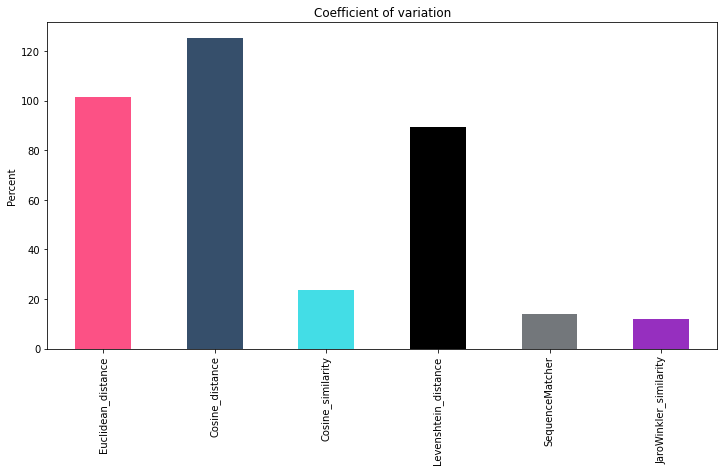

In [13]:
df=data.describe()
df.iloc[1]
df.iloc[2]
df=df.iloc[2]/df.iloc[1]*100

plt.figure(figsize=(12,6))
plt.title("Coefficient of variation")
colors = ['#fc5185','#364f6b','#43dde6','#000000','#73777b','#962fbf','#dda7c7','#e4b9d2','#eacadd','#f1dce8']

df.plot.bar(color=colors)
plt.ylabel("Percent")
plt.show()

## Analise Levenshtein distance

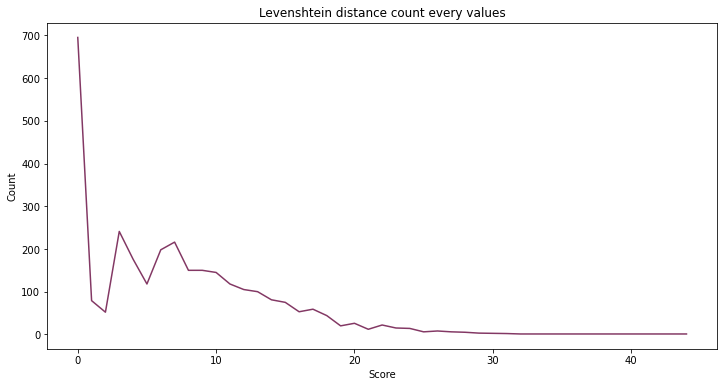

In [14]:
plt.figure(figsize=(12,6))
plt.title("Levenshtein distance count every values")
#colors = ['#833864','#bc5090','#c2619b','#c972a6','#d084b1','#d696bc','#dda7c7','#e4b9d2','#eacadd','#f1dce8']
data['Levenshtein_distance'].value_counts().sort_index().plot(color='#833864')
plt.xlabel("Score")
#plt.ylim(0,100)
plt.ylabel("Count")
plt.show()

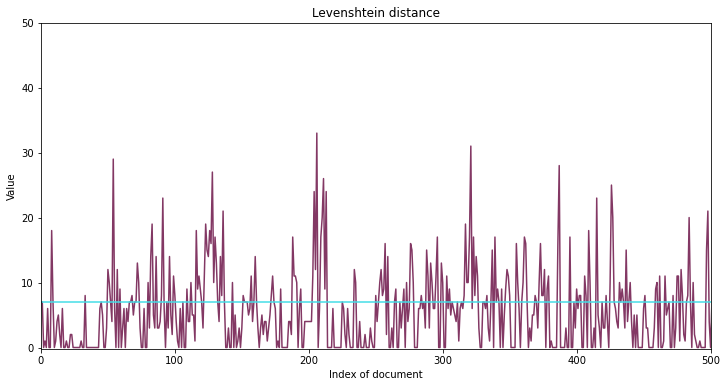

In [15]:
df = pd.DataFrame([data['Levenshtein_distance'].mean()] * len(data), columns=['name'])

plt.figure(figsize=(12,6))
plt.title("Levenshtein distance")
#colors = ['#833864','#bc5090','#c2619b','#c972a6','#d084b1','#d696bc','#dda7c7','#e4b9d2','#eacadd','#f1dce8']
data['Levenshtein_distance'].sort_index().plot(color='#833864')#)
df['name'].plot(color='#43dde6')
plt.xlabel("Index of document")
plt.xlim(0,500)
plt.ylim(-0.2,50)
plt.ylabel("Value")
plt.show()

## Entity matching for two strings

In [16]:
a = 'Antek gets four and half from Text Minning'
print(a)

b = 'Karolina gets five from Text Mining'
print(b)
dataset_col1 = pd.DataFrame([a], columns=['name'])
dataset_col2 = pd.DataFrame([b], columns=['name'])

together_dataset = pd.concat([dataset_col1.iloc[0], dataset_col2.iloc[0]])
#print(together_dataset)
dataset_vector_voc, dataset_titles_voc = vectorizing(together_dataset)
print(dataset_vector_voc)
print(dataset_titles_voc)

dataset_vector_col1, dataset_titles_col1 = vectorizing_voc(dataset_col1.iloc[0], dataset_titles_voc)
print(dataset_vector_col1)
print(dataset_titles_col1)
df1 = pd.DataFrame(dataset_vector_col1, columns=dataset_titles_col1)
    
    
dataset_vector_col2, dataset_titles_col2 = vectorizing_voc(dataset_col2.iloc[0], dataset_titles_voc)
print(dataset_vector_col2)
print(dataset_titles_col2)
df2 = pd.DataFrame(dataset_vector_col2, columns=dataset_titles_col2)

print(f"Euclidean distance: {euclidean_distances(df1,df2)[0,0]}")
print(f"Cosine distance: {cosine_distances(df1,df2)[0,0]}")
print(f"Cosine similarity: {cosine_similarity(df1,df2)[0,0]}")
print(f"Levenshtein distance: {Levenshtein.distance(a,b)}")
print(f"Difflib SequenceMatcher: {CSequenceMatcher(None, a,b).ratio()}")
print(f"JaroWinkler similarity: {jaro_winkler_metric(a,b)}")

Antek gets four and half from Text Minning
Karolina gets five from Text Mining
[[1 0 1 1 0 0 1]
 [0 1 0 0 1 1 1]]
['antek', 'five', 'four', 'half', 'karolina', 'mine', 'text']
[[1 0 1 1 0 0 1]]
['antek', 'five', 'four', 'half', 'karolina', 'mine', 'text']
[[0 1 0 0 1 1 1]]
['antek', 'five', 'four', 'half', 'karolina', 'mine', 'text']
Euclidean distance: 2.449489742783178
Cosine distance: 0.75
Cosine similarity: 0.25
Levenshtein distance: 21
Difflib SequenceMatcher: 0.6493506493506493
JaroWinkler similarity: 0.7240655401945725


## Entity matching for two strings from database

In [17]:
n=5

dataset_col1=data.colA.iloc[[n]]
dataset_col2=data.colB.iloc[[n]]

a = data.colA.iloc[0]
print(a)
b = data.colB.iloc[0]
print(b)

together_dataset = pd.concat([dataset_col1, dataset_col2])
#print(together_dataset)
dataset_vector_voc, dataset_titles_voc = vectorizing(together_dataset)
print(dataset_vector_voc)
print(dataset_titles_voc)

dataset_vector_col1, dataset_titles_col1 = vectorizing_voc(dataset_col1, dataset_titles_voc)
print(dataset_vector_col1)
print(dataset_titles_col1)
df1 = pd.DataFrame(dataset_vector_col1, columns=dataset_titles_col1)
    
    
dataset_vector_col2, dataset_titles_col2 = vectorizing_voc(dataset_col2, dataset_titles_voc)
print(dataset_vector_col2)
print(dataset_titles_col2)
df2 = pd.DataFrame(dataset_vector_col2, columns=dataset_titles_col2)

print(f"Euclidean distance: {euclidean_distances(df1,df2)[0,0]}")
print(f"Cosine distance: {cosine_distances(df1,df2)[0,0]}")
print(f"Cosine similarity: {cosine_similarity(df1,df2)[0,0]}")
print(f"Levenshtein distance: {Levenshtein.distance(a,b)}")
print(f"Difflib SequenceMatcher: {CSequenceMatcher(None, a,b).ratio()}")
print(f"JaroWinkler similarity: {jaro_winkler_metric(a,b)}")

Black N Yellow - Arkosh Gaming
Black N Yellow - Arkosh
[[1 1 1]
 [1 0 1]]
['angel', 'king', 'loui']
[[1 1 1]]
['angel', 'king', 'loui']
[[1 0 1]]
['angel', 'king', 'loui']
Euclidean distance: 1.0
Cosine distance: 0.18350341907227397
Cosine similarity: 0.816496580927726
Levenshtein distance: 7
Difflib SequenceMatcher: 0.8679245283018868
JaroWinkler similarity: 0.9533333333333333


## Problems with documents contains only stop words

In [18]:
dataset_vector_voc, dataset_titles_voc = vectorizing(['JYP - Ilves','JyP - Ilves'])
print(dataset_vector_voc)
print(dataset_titles_voc)

sample=['JYP - Ilves','JyP - Ilves']
vectorizer1 = CountVectorizer(tokenizer=text_tokenizer)
print(1)
X_transform_sample = vectorizer1.fit_transform(sample)
print(1)
titles_sample = (vectorizer1.get_feature_names())
print(1)
array = X_transform_sample.toarray()
print(1)

ValueError: empty vocabulary; perhaps the documents only contain stop words